# FERPlus data preparation

The goal of this script is to process the data from: https://www.kaggle.com/datasets/subhaditya/fer2013plus <br>
so that they have an image size of 112x112 and reorganize them into an Images folder and a labels.csv file.

In [1]:
import numpy as np, os, PIL.Image as Image, pandas as pd, cv2
os.chdir('..')

In [2]:
dataset_dir = os.path.join('data', 'datasets', 'emotion recognition', 'FERPlus')
os.path.exists(dataset_dir)

True

In [3]:
old_images_dir = os.path.join(dataset_dir, 'fer2013plus', 'fer2013')
os.path.exists(old_images_dir)

True

In [4]:
new_images_dir = os.path.join(dataset_dir, 'Images')
os.makedirs(new_images_dir, exist_ok = True)

In [5]:
label_translation = {
    0 : 'neutral',
    1 : 'happiness',
    2 : 'sadness',
    3 : 'surprise',
    4 : 'fear',
    5 : 'disgust',
    6 : 'anger'
}

In [6]:
inverse_label_translation = {value : key for key, value in label_translation.items()}
inverse_label_translation

{'neutral': 0,
 'happiness': 1,
 'sadness': 2,
 'surprise': 3,
 'fear': 4,
 'disgust': 5,
 'anger': 6}

In [7]:
counter = 0
output_filenames = []
emotions = []
splits = []
for dir, dirname, filenames in os.walk(old_images_dir):

    if not 'contempt' in dir: # skip the contempt labels
        if len(filenames) != 0:
            for filename in filenames:
                if filename.endswith(('.jpg', '.png', '.jpeg')):
                    image_path = os.path.join(dir, filename)

                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (112, 112), interpolation = cv2.INTER_LANCZOS4)
                    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

                    output_filename = f'{counter}.jpg'
                    cv2.imwrite(os.path.join(new_images_dir, output_filename), image)

                    output_filenames.append(output_filename)
                    
                    split_path, emotion = os.path.split(dir)
                    emotion = inverse_label_translation[emotion]
                    emotions.append(emotion)

                    split = os.path.split(split_path)[1]
                    splits.append(split)

                    counter += 1

In [8]:
labels_df = pd.DataFrame(
    data = {
        'filename' : output_filenames,
        'label' : emotions,
        'split' : splits
    }
)

labels_df.to_csv(os.path.join(dataset_dir, 'labels.csv'), index = False)

# EDA

In [9]:
from matplotlib import pyplot as plt

In [10]:
labels_df = pd.read_csv(os.path.join(dataset_dir, 'labels.csv'))

In [11]:
labels_df.head()

,filename,label,split
0,0.jpg,1,train
1,1.jpg,1,train
2,2.jpg,1,train
3,3.jpg,1,train
4,4.jpg,1,train


In [13]:
emotions, emotion_counts = np.unique(labels_df['label'], return_counts = True)
sorted_idx = np.argsort(emotion_counts)
emotion_counts = emotion_counts[sorted_idx]
emotions = emotions[sorted_idx]

In [14]:
figures_output_dir = os.path.join('data', 'figures', 'Emotion Recognition', 'FERPlus')
os.makedirs(figures_output_dir, exist_ok = True)

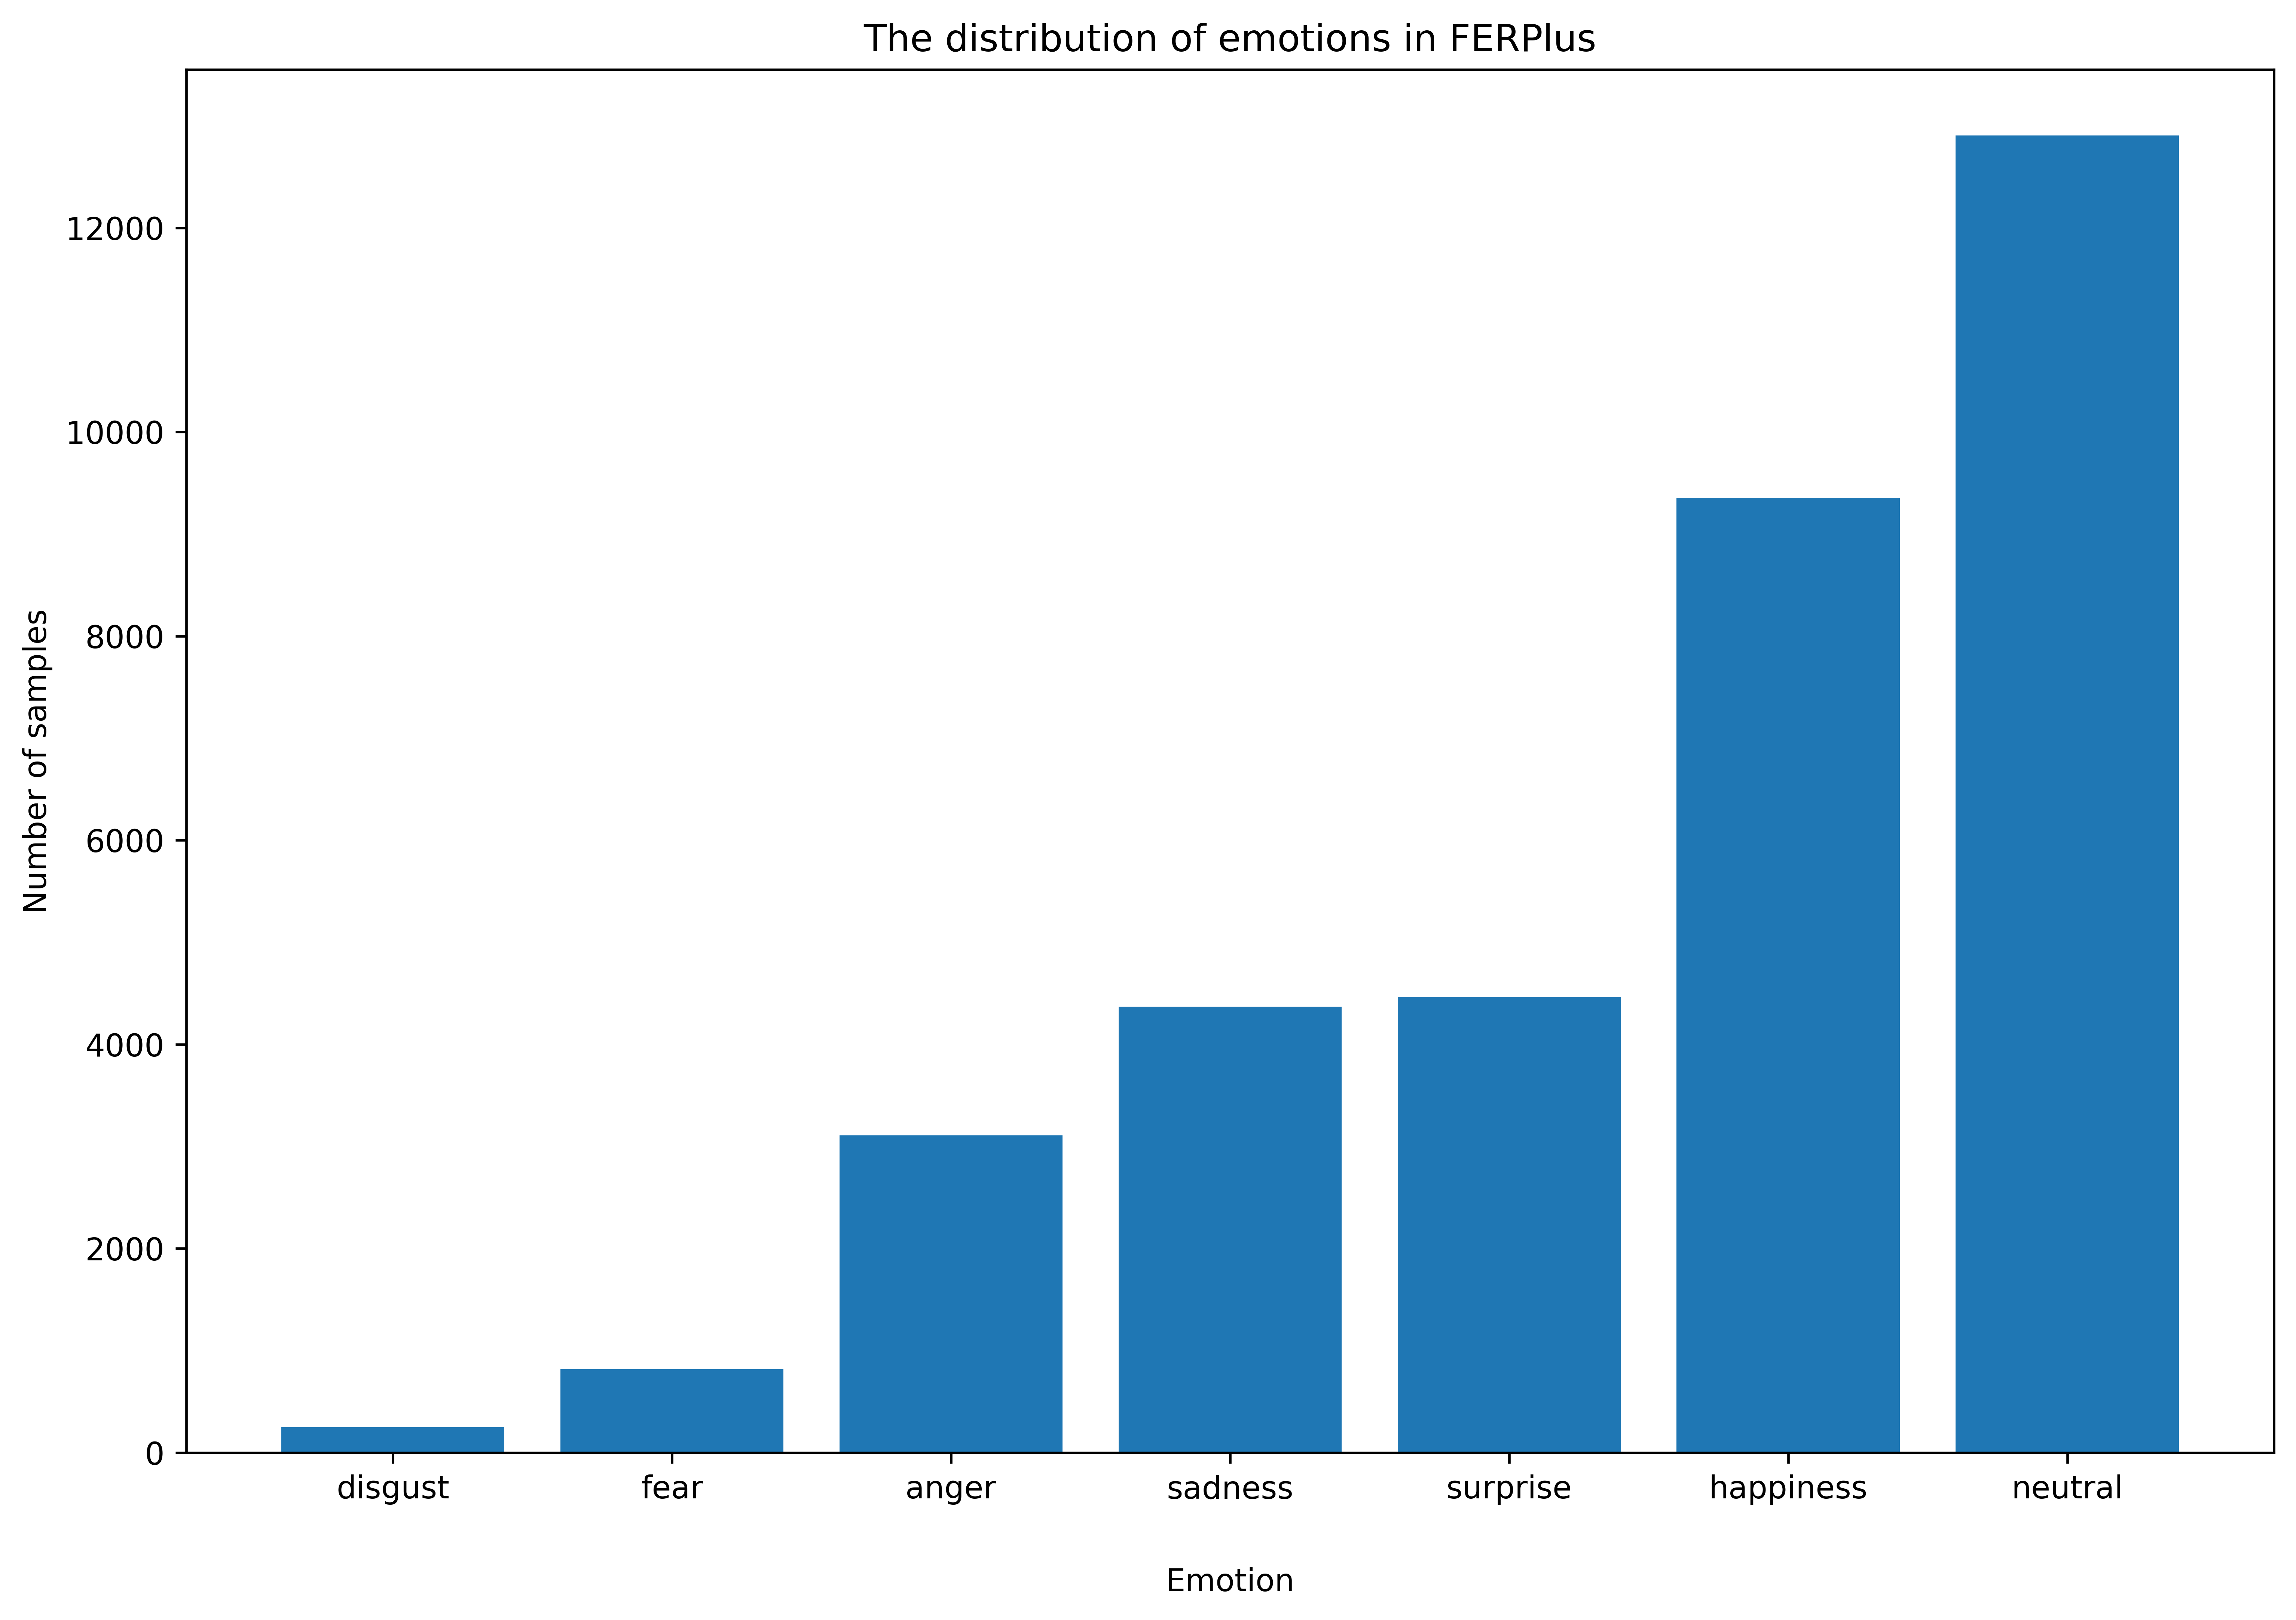

In [15]:
plt.figure(figsize = (12, 8), dpi = 600)
plt.bar(x = [label_translation[emotion] for emotion in emotions], height = emotion_counts)
plt.xlabel('Emotion', labelpad = 20)
plt.ylabel('Number of samples')
plt.title("The distribution of emotions in FERPlus")
plt.savefig(
    os.path.join(figures_output_dir, 'The distribution of emotions in FERPlus')
)
plt.show()

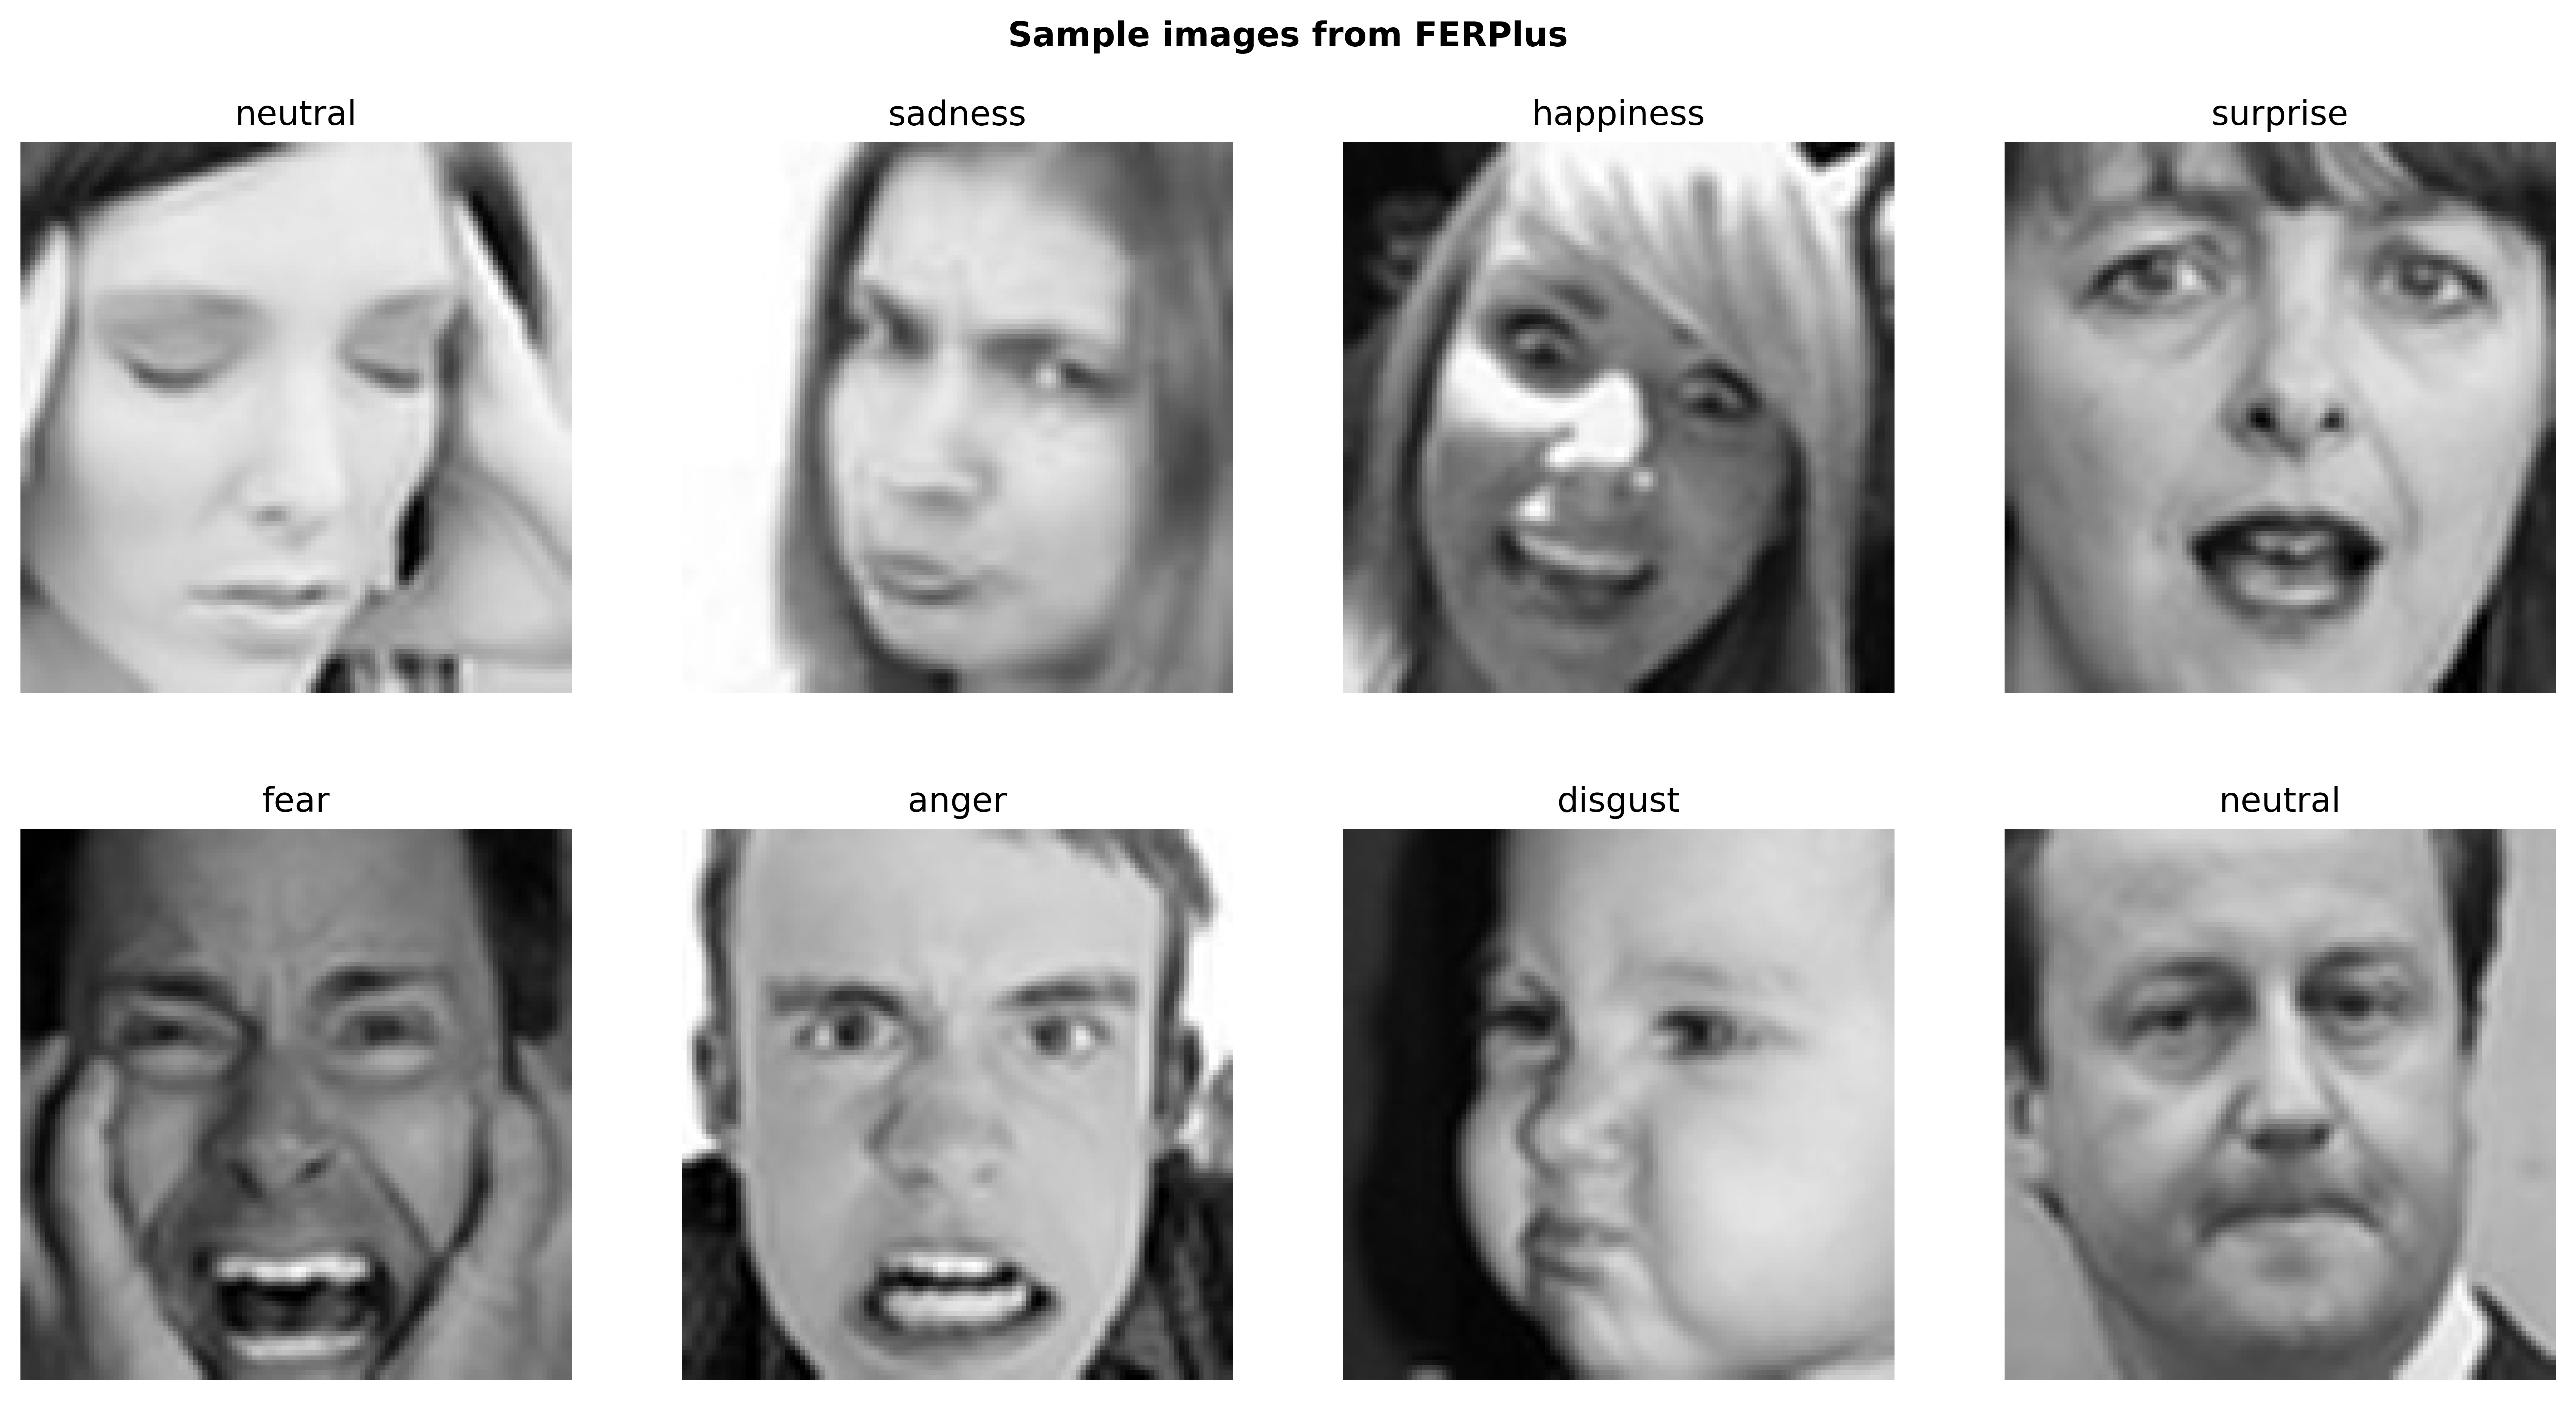

In [18]:
plt.figure(figsize = (16, 8), dpi = 600)
plt.title('Sample images from FERPlus', pad = 30, fontweight = 'bold')
plt.axis('off')

shown_emotions = []
for i in range(8):
    index = np.random.randint(low = 0, high = len(labels_df))
    emotion = labels_df.iloc[index]['label']

    while emotion in shown_emotions:
        index = np.random.randint(low = 0, high = len(labels_df))
        emotion = labels_df.iloc[index]['label']

        if len(shown_emotions) == 7:
            break
    shown_emotions.append(emotion)

    image_path = os.path.join(new_images_dir, labels_df.iloc[index]['filename'])
    image = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f'{label_translation[emotion]}')
    plt.axis('off')

plt.show()